In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [24]:
list_of_points = []
Gaussian_points = []
Function_points = []

list_of_points = np.random.uniform(0, 1, 1000)
Gaussian_points = np.random.normal(0, 0.5, 1000)

x_values = {}
ε_values = {}
y_values = {}
n = 1

In [25]:
for i in range(1000):
    x_n = list_of_points[i]
    x_values[f'x_{n}'] = x_n
    ϵ_n = Gaussian_points[i]
    ε_values[f'ϵ_{n}'] = ϵ_n
    n = n + 1

#compution    
n = 1
for i in range(1000):
    y_n = x_values[f'x_{n}'] + ε_values[f'ϵ_{n}']
    y_values[f'y_{n}'] = y_n
    Function_points.append(y_n)
    n = n + 1

x = np.array(list_of_points)
y = np.array(Function_points)

In [26]:
def f(a, x, y):
    n = len(x)
    sum_of_squares = 0
    for i in range(n):
        sum_of_squares += (a * x[i] - y[i]) ** 2
    return sum_of_squares

initial_guess = 0

result = minimize(f, initial_guess, args=(x, y))
best_a = result.x

print(best_a)

[1.02001711]


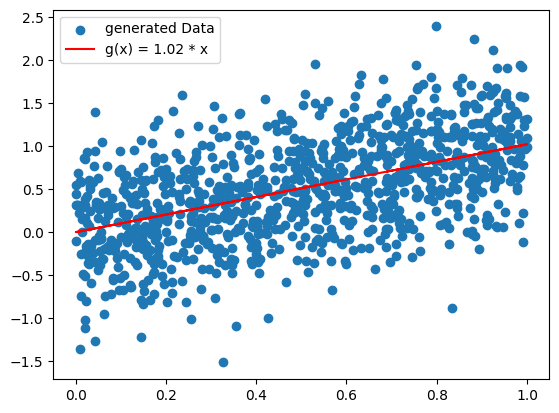

In [27]:
#scatter plots
plt.scatter(x, y, label='generated Data')
plt.plot(x, best_a[0] * x, color='red', label=f'g(x) = {best_a[0]:.2f} * x')
plt.legend()
plt.show()

In [28]:
d = 3
n = len(x)

X = np.vstack([x**k for k in range(d + 1)]).T

a = np.linalg.inv(X.T @ X) @ X.T @ y

print("Koeffizienten a:", a)

Koeffizienten a: [ 0.01824658  0.45571992  1.38720139 -0.8408362 ]


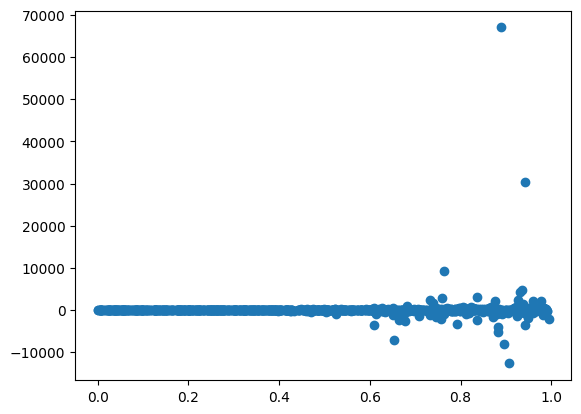

In [29]:
#new data (4)
def generate_y(xi, ξi):
    return 30 * (xi - 0.25) ** 2 / ((xi - 0.75) ** 2 + ξi)

xi_values = np.random.uniform(0, 1, 1000)
ξi_values = np.random.normal(0, 0.1, 1000)

yi_values = generate_y(xi_values, ξi_values)

x_new = np.array(xi_values)
y_new = np.array(yi_values)

plt.scatter(x_new, y_new, label='generated Data')
plt.show()